# SIWA LAB 3

In [ ]:
import torch

## Grafy obliczeniowe

Głównym powodem uzywania tensorów w głębokim oczenieniu jest fakt że pozwalają one na automatycznie liczenie pochodnych/gradientów funkcji (pochodna dla skalara, gradient dla wielu zmiannych)

Pozwala nam to na policzenie pochodnej po wagach sieci neuronowej

Wykonując operacje na tensorach tworzymy **graf obliczeniowy**. Graf ten obrazuje jak ozyskać wynik z wartości wejściowych.

Pytorch działa na zasadzie **define-by-run** co oznacza że graf obliczeniowy stowrzy sie automatycznie jeśli będziemy wykonywać obliczenia.



### Gradient tensora

Domyśle tensory nie śledzą gradientów. Czy gradient jest liczony można sprawdzić za pomocą parametru `.requires_grad`

In [ ]:
x = torch.Tensor(2,3,4)

In [ ]:
x.requires_grad

False

Możemy włączyć śledzenie gradientów

In [ ]:
x.requires_grad = True

In [ ]:
x.requires_grad

True

### Przykładowy graf obliczeniowy

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)

In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print(y)

tensor(12.6667, grad_fn=<MeanBackward0>)


Widzimy że tensor `y` "zapamiętuje" operacja która została użyta do otrzymania go i zapisuje funkcje jej gradientu w parametrze `grad_fn`. Jeśli ustawimy `requires_grad= True` na danych wejściowych to wszyskie tensory z nich uzyskane będą miały funkcje gradientu

In [ ]:
y.grad_fn

## Liczenie gradientów

Liczenie gradientów odbywa się za pomocą funkcji `.backward()` zastosowanej do danych wyjściowych.
Funkacja ta liczy propagacje wsteczną (backpropagation) po całym grafie licząc gradienty od końca grafu do początku

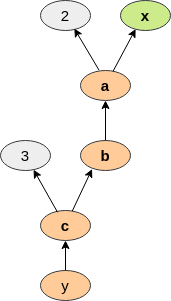

In [ ]:
y.backward()

Po policzeniu gradientów możemy uzyskac ich wartości za pomocą atrybutu `.grad`

In [ ]:
x.grad

tensor([1.3333, 2.0000, 2.6667])

## Wykorzystanie karty graficznej

funkcja `torch.coda.is_available()` sprawdza czy dostępna jest karta graficzna

In [ ]:
torch.cuda.is_available()

False

### Przenoszenie tensorów na kartę graficzną

Domyślnie wszystkie utowrzone tensory zapisywane są na CPU a nie na karcie grafcznej

In [ ]:
x = torch.Tensor(2,3)

In [ ]:
x.device

device(type='cpu')

Aby przenosić tensory z cpu na gpu i dowrotnie używamy funkcji `.to()`

GPU

In [ ]:
torch.device("cpu")

device(type='cpu')

GPU

In [ ]:
torch.device("cuda")

device(type='cuda')

Przeniesienie na GPU

In [ ]:
x.to(torch.device("cuda"))

RuntimeError: ignored

Dynamicznie sprawdzenie czy karta graficzna jest dostępna, jeśli nie to wykorzystanie CPU

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
x = x.to(device)

## Konwersja z tensorów na numpy

In [ ]:
x =  torch.Tensor(2,3)

In [ ]:
x.numpy()

array([[3.5950996e-38, 4.5745388e-41, 1.2552939e-34],
       [0.0000000e+00, 1.2539871e-34, 0.0000000e+00]], dtype=float32)

Aby przekonwertować tensor ktory jest GPU muimy najpierw przenieść go na CPU

In [ ]:
device = 'cuda'
x = torch.Tensor(2,3).to(device)

In [ ]:
x.numpy()

TypeError: ignored

In [ ]:
x.cpu().numpy()

array([[0.0000000e+00, 0.0000000e+00, 7.7052459e+31],
       [7.2147959e+22, 1.5766192e-19, 1.0255947e-08]], dtype=float32)

Aby przekonwertować tensor który wymaga gradientów musmy najpierw odłączyć go od grafu obliczeniowego używając funkcji `.detach()`

In [ ]:
x = torch.Tensor(2,3)

In [ ]:
x.requires_grad =  True

In [ ]:
x.numpy()

RuntimeError: ignored

In [ ]:
x.detach().numpy()

array([[2.1707407e-18, 7.0952393e+22, 1.7748370e+28],
       [1.8175865e+31, 7.2708392e+31, 5.0777989e+31]], dtype=float32)

# Zadania

## 1. Zaimplementuj algorytm feed forward
Zaimplmentuj algortym feed forward dla sieci z dwoma warstawami
* wejście do sieci ma rozmiar 784
* pierwsza warstwa powinna mieć 100 neuronów
* druga warstwa (wyjściowa) powinna mieć 10 neuronów

Batch size wynosi 64 (ale nie ma to wpływu na rozmiar wag)



In [ ]:
dimensions = [784,100,10]
N_batch = 64

Inicjalizacja losowych danych wejściowych i wyjściowych

In [ ]:
X = torch.randn(dimensions[0], N_batch)
y = torch.randn(dimensions[-1], N_batch)

### Zainicjalizuj wagi i bias
Zainicjalizuj wagi i bias dla warst według rozkladu naturalnego krozystając z funckji `torch.randn()`. Zwróć uwagę na to jakie wymiary powinny mieć wagi każdej warstwy na podstawie wymiarów wejścia i wyjścia.
Pamiętaj aby poczas inicjalizacji przekazać zmiennym parametr `requires_grad = True` będziemy potrzebować gradientów do aktualizajci wag

  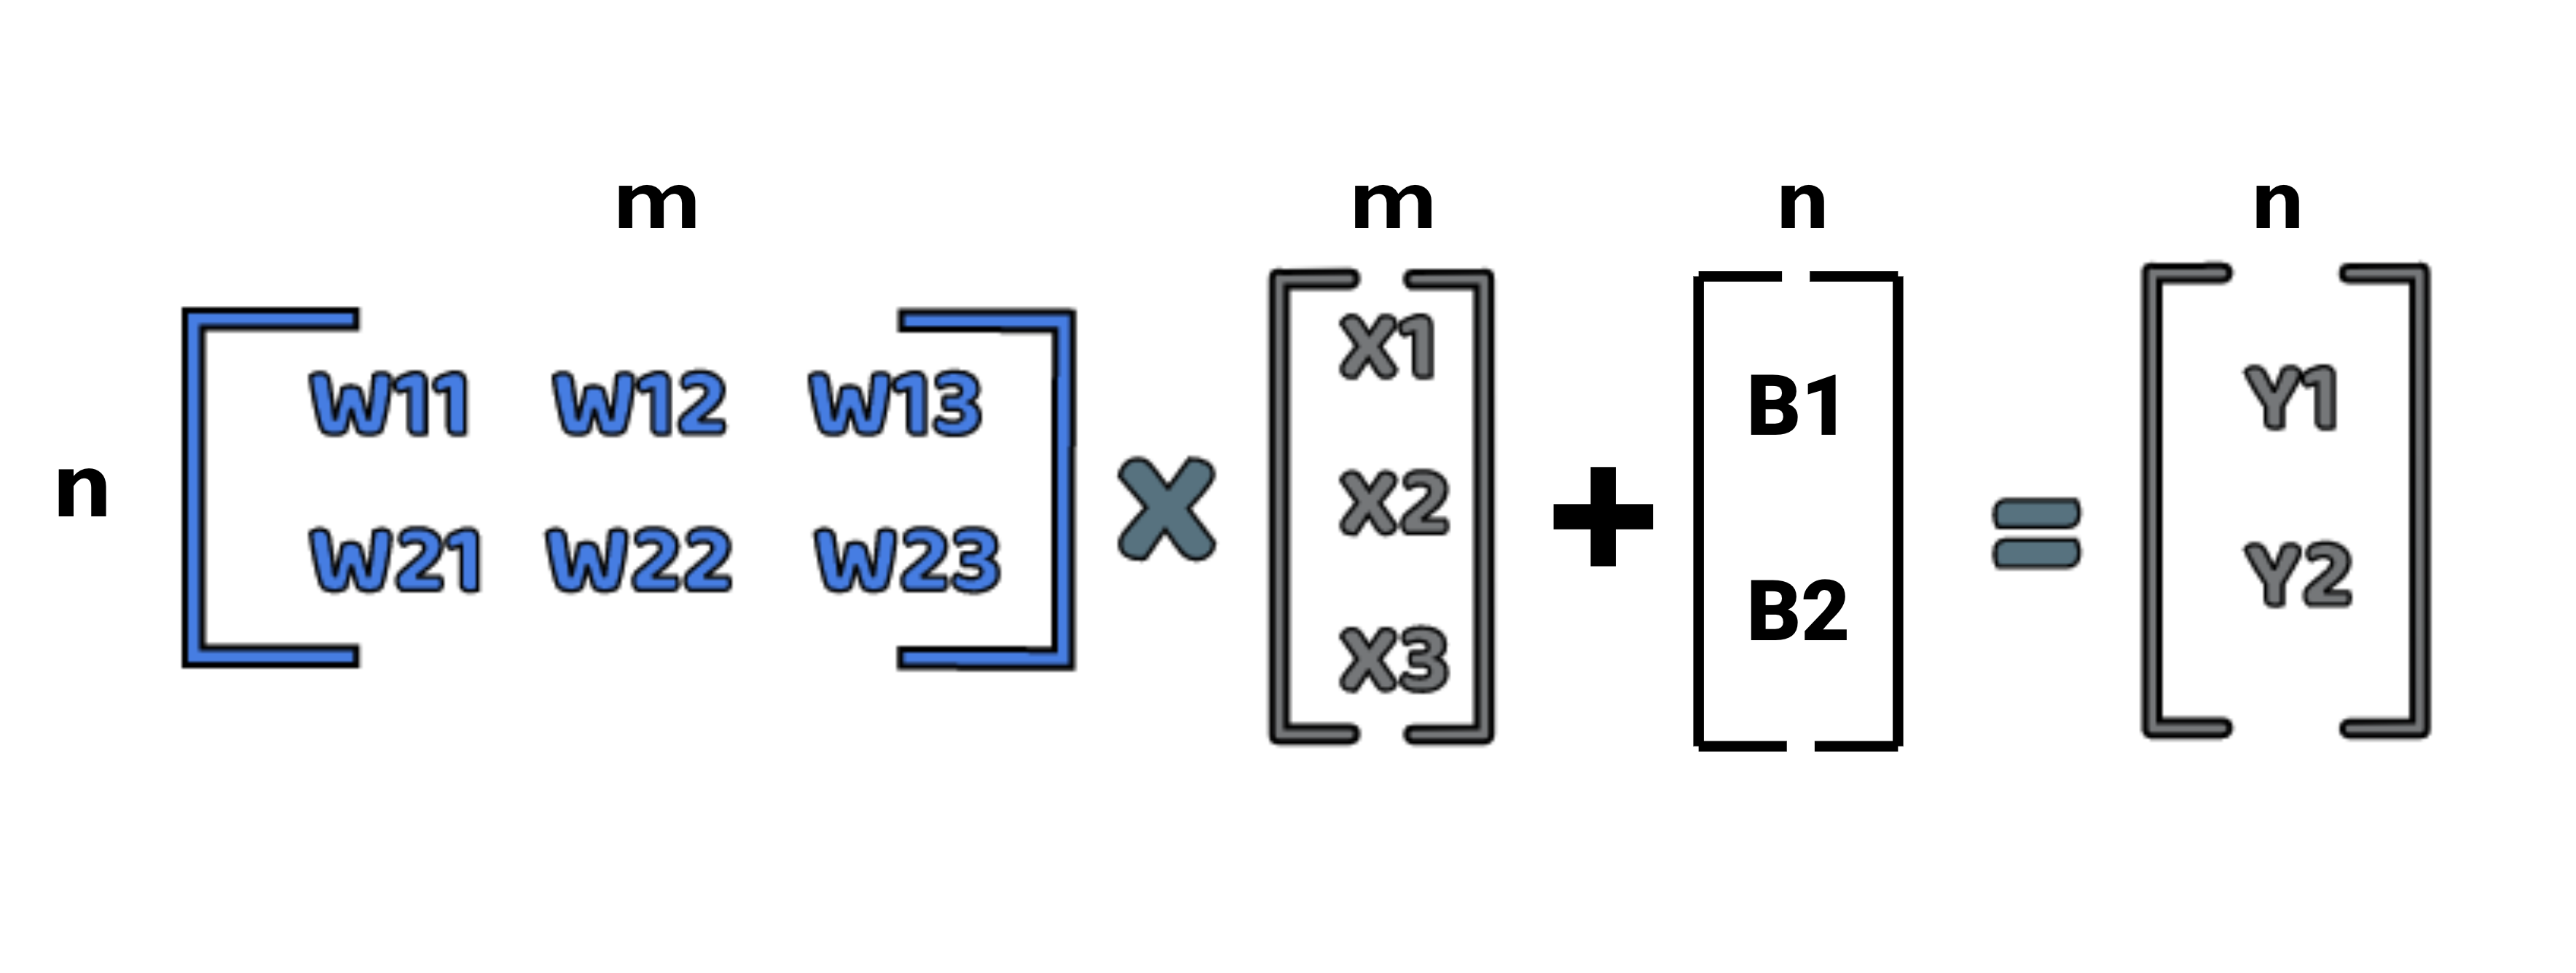

In [ ]:
W1 = torch.randn(dimensions[1], dimensions[0], requires_grad=True)
W2 = torch.randn(dimensions[2], dimensions[1], requires_grad=True)
b1 = torch.randn(dimensions[1], 1, requires_grad=True)
b2 = torch.randn(dimensions[2], 1, requires_grad=True)


### Zaimplementuj algorytm feed forward
Zaimplementuj algorytm feed forward dla obu warst korzystąjc z mnożenia macierzy (`torch.mm()`), jako funkcje aktywacji przyjmij relu (`torch.relu()`)

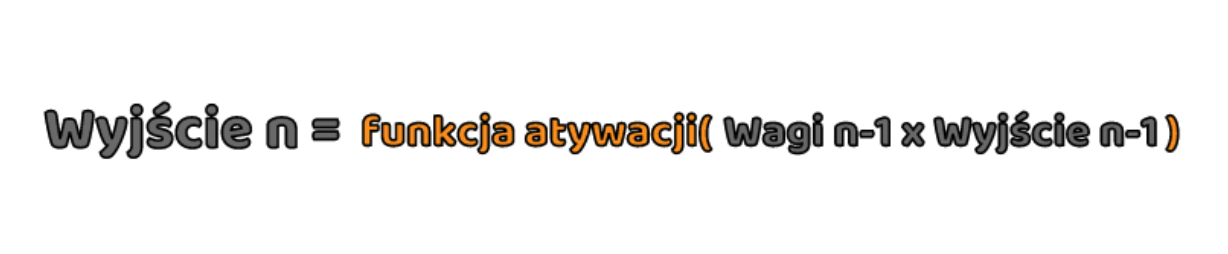

In [ ]:
Z1 = torch.mm(W1, X) + b1  # mnożenie macierzy
A1 = torch.relu(Z1)        # funkcja aktywacji
Z2 = torch.mm(W2, A1) + b2 # mnożenie macierzy
A2 = torch.relu(Z2)        # funkcja aktywacji

In [ ]:
A2.shape

torch.Size([10, 64])

## 2. Zaimplemetuj backpropagation

### Policz funkcje błędu
Jako funkcje funkcji błędu użyj średniego błędu kwadratowego (Mean Square Error - MSE).
$$
loss = (y - \hat{y})^2
$$

Pamiętaj że wynikiem funkcji błędu powinien być skalar - użyj funkcji `.mean()` na tensorze aby by uśrednić wyniki dla wszyskich predykcji

In [ ]:
loss = ((y - A2) ** 2).mean()

## Policz gradienty
Policz gradienty dla funkcji błędu

In [ ]:
loss.backward()

gradient_W1 = W1.grad
gradient_b1 = b1.grad
gradient_W2 = W2.grad
gradient_b2 = b2.grad

### Zaktualizji wartości wag na podstawie policznych gradientów.
Użyj lr 5e-6.


In [ ]:
lr = 5e-6

In [ ]:
with torch.no_grad():
      W1 -= lr * gradient_W1
      b1 -= lr * gradient_b1
      W2 -= lr * gradient_W2
      b2 -= lr * gradient_b2
      # Manually zero the gradients after updating weights
      W1.grad.zero_()
      W2.grad.zero_()
      b1.grad.zero_()
      b2.grad.zero_()

### 3 Zaiplementuj pętle treningu
powtórz operacji feed-forward i backpropagation dla 600 epok.

In [ ]:
epochs = 600

In [ ]:
W1 = torch.randn(dimensions[1], dimensions[0], requires_grad=True)
W2 = torch.randn(dimensions[2], dimensions[1], requires_grad=True)
b1 = torch.randn(dimensions[1], 1, requires_grad=True)
b2 = torch.randn(dimensions[2], 1, requires_grad=True)

In [ ]:
for epoch in range(epochs):
    Z1 = torch.mm(W1, X) + b1
    A1 = torch.relu(Z1)
    Z2 = torch.mm(W2, A1) + b2
    A2 = torch.relu(Z2)

    # Oblicz stratę
    loss = ((y - A2) ** 2).mean()
    loss.backward()

    if epoch % 50 == 0:
      print(f"Epoch {epoch}, Loss: {loss.item()}")

    # Update weights & biases
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad
        # Manually zero the gradients after updating weights
        W1.grad.zero_()
        W2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

Epoch 0, Loss: 24550.943359375
Epoch 50, Loss: 12408.5869140625
Epoch 100, Loss: 7298.2421875
Epoch 150, Loss: 4751.57958984375
Epoch 200, Loss: 3299.88818359375
Epoch 250, Loss: 2398.10107421875
Epoch 300, Loss: 1804.482177734375
Epoch 350, Loss: 1393.4825439453125
Epoch 400, Loss: 1098.798095703125
Epoch 450, Loss: 880.8323974609375
Epoch 500, Loss: 715.9158935546875
Epoch 550, Loss: 587.975341796875
